<center><h2><b>Assignment 2: Atari Breakout</b></h2><center>
   <br>

<video controls src="breakout.mp4" autoplay ></video>

The task is to train an agent to play a game of atari breakout.


First install OpenAI gym:

https://gym.openai.com/

pip install gym

Then install the atari environment for windows:

pip install --no-index -f https://github.com/Kojoley/atari-py/releases atari_py

Some helper functions to visualize the game are provided.

The goal is to design an agent that will play breakout seeing the raw pixels on the screen. You have to design your own algorithm - you can use DQN, policy gradients, evolutionary strategies or even throw away function approximation - if you can make it work.

The 2016 DQN paper (https://web.stanford.edu/class/psych209/Readings/MnihEtAlHassibis15NatureControlDeepRL.pdf) achieved a score of around 300 - and the algorithm was tuned to play well across multiple atari games. So we should aim to achieve a similar score for a single domain. 




Please implement your algorithm from scratch i.e don't use code available online. This is a month long project, and the best performing agent will get a treat from the team ;)



In [8]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import random

%matplotlib inline

def display_video(frames):
    
    plt.figure(figsize=(frames[0].shape[1] / 40.0, frames[0].shape[0] / 40.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=100)
    return anim.to_html5_video()


In [41]:
def argmax_q(processed_observation, Q):
    D = {}
    for action in [0, 1, 2, 3]:
        D[action] = Q[(processed_observation, action)]
    return max(D, key=D.get)

def initialize_q(processed_observation, Q):
    Q[(processed_observation,0)] = random.random()
    Q[(processed_observation,1)] = random.random()
    Q[(processed_observation,2)] = random.random()
    Q[(processed_observation,3)] = random.random()

    return Q

def process(observation):
    observation = observation[95:,:,2]
    return tuple(observation[::6,::6].flatten())
    

def test(num_episodes, Q):
    
    total_reward = 0
    
    for i in range(num_episodes):

        env = gym.make('Breakout-v0')
        observation = env.reset()
        done = False
        frames = []
        while not done: # risky
            
            frames.append(env.render(mode = 'rgb_array'))
            
            processed_observation = process(observation)
            
            if (processed_observation, 0) not in Q:
                
                Q = initialize_q(processed_observation, Q)

            if random.random()>0.1:

                action = argmax_q(processed_observation, Q)
            
            else:
                
                action = env.action_space.sample()
            
            observation, reward, done, info = env.step(action)

            total_reward += reward
                
    print ("Tested ", num_episodes , " Episodes, Average reward: ", total_reward/num_episodes)
    return frames




def train(num_episodes, Q):
    
    total_reward = 0
    
    for i in range(num_episodes):

        env = gym.make('Breakout-v0')
        # Run a demo of the environment
        observation = env.reset()
        done = False
        frames = []
        
        i = 0
        while not done: # risky
            i+=1
            
            
            processed_observation = process(observation) 
            
            if (processed_observation, 0) not in Q:
                Q = initialize_q(processed_observation, Q)

            if random.random()<epsilon:

                action = argmax_q(processed_observation, Q)
            
            else:
                
                action = env.action_space.sample()
                
            print(i, action)
                        
            next_observation, reward, done, info = env.step(action)
            
            # Update Q(s,a) here
            
            observation = next_observation
            


    return Q



Tested  10  Episodes, Average reward:  1.5


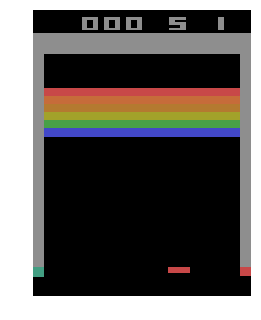

In [43]:
# initialize Q table
alpha = 0.05
gamma = 0.95
epsilon = 0.5

Q = {}


frames = test(10, Q) # test policy for 10 turns
HTML(display_video(frames)) # displays the last test episode (optional)
#Q = train(100,Q) # train policy for 100 turns
